### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
coupondata = pd.read_csv('sample_data/coupons.csv')
coupondata

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [ ]:
coupondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
# convert the data types of all the columns appropriately based on the data
coupondata = coupondata.convert_dtypes()
coupondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  string
 1   passanger             12684 non-null  string
 2   weather               12684 non-null  string
 3   temperature           12684 non-null  Int64 
 4   time                  12684 non-null  string
 5   coupon                12684 non-null  string
 6   expiration            12684 non-null  string
 7   gender                12684 non-null  string
 8   age                   12684 non-null  string
 9   maritalStatus         12684 non-null  string
 10  has_children          12684 non-null  Int64 
 11  education             12684 non-null  string
 12  occupation            12684 non-null  string
 13  income                12684 non-null  string
 14  car                   108 non-null    string
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [ ]:
# Calculate the percentage of missing values in each variable
missing_values = (coupondata.isna().sum() / coupondata .shape[0]) * 100
missing_values
# we find that the attribute "car" mostly(99%) is has null/blank values.


,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
time,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000


In [ ]:

# In the previous step we found that Attribute car has lots(99%) of Null data.
#Since this appears to be junk, I'm dropping this attribute



3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:

# Drop the "car" column as it does not add any value to the dataset
newcoupondata = coupondata.drop('car', axis = 1)
newcoupondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  string
 1   passanger             12684 non-null  string
 2   weather               12684 non-null  string
 3   temperature           12684 non-null  Int64 
 4   time                  12684 non-null  string
 5   coupon                12684 non-null  string
 6   expiration            12684 non-null  string
 7   gender                12684 non-null  string
 8   age                   12684 non-null  string
 9   maritalStatus         12684 non-null  string
 10  has_children          12684 non-null  Int64 
 11  education             12684 non-null  string
 12  occupation            12684 non-null  string
 13  income                12684 non-null  string
 14  Bar                   12577 non-null  string
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# find the total count of the dataset
countofrecords = newcoupondata.shape[0]
countofrecords
# Find the number of customers who accepted the coupon which is Y= 1
customers_accepted = newcoupondata['Y'].apply(lambda a: 1 if a == 1 else 0).sum()
customers_accepted
# divide the accepted customers by total customers to get the percent
percent_accepted_coupons = customers_accepted / countofrecords
(percent_accepted_coupons)*100
# we understand from the above that around 56% of the customers accepted the coupons


56.84326710816777

5. Use a bar plot to visualize the `coupon` column.

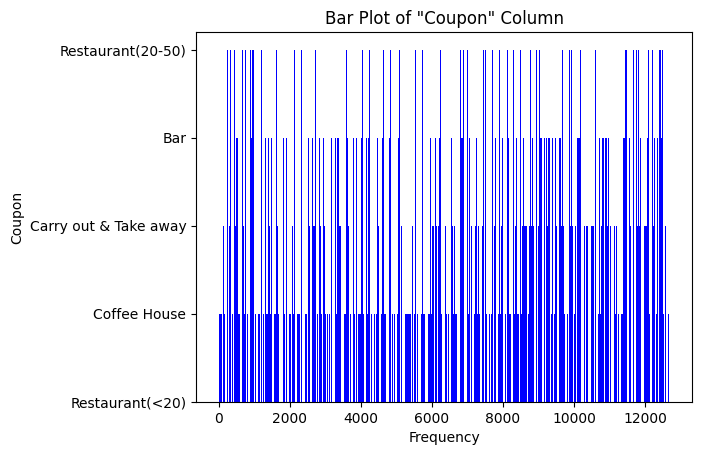

In [ ]:
# Create the bar plot
plt.bar(newcoupondata.index, newcoupondata['coupon'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Coupon')
plt.title('Bar Plot of "Coupon" Column')
plt.show()


6. Use a histogram to visualize the temperature column.

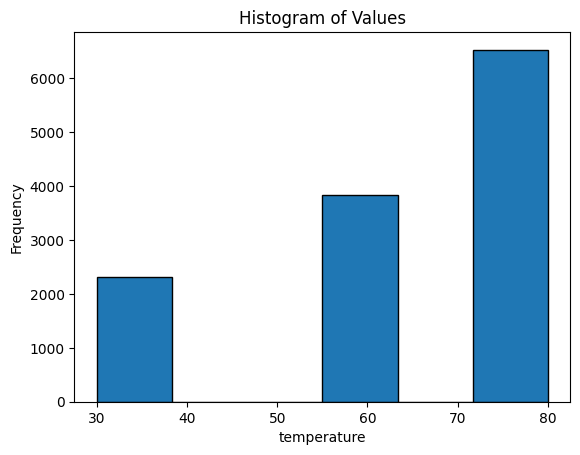

In [ ]:
# Create the histogram to find the distribution of temperature data
# we see that there are more records of dataset where the temperature is high
plt.hist(newcoupondata['temperature'], bins=6, edgecolor='black')
plt.xlabel('temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
barCoupons = newcoupondata[newcoupondata['coupon'] == 'Bar']
barCoupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [ ]:
total_bar_coupons = barCoupons.shape[0]
total_bar_coupons
accepted_bar_coupons = barCoupons['Y'].apply(lambda a: 1 if a == 1 else 0).sum()
accepted_bar_coupons
acceptance_rate = (accepted_bar_coupons / total_bar_coupons)*100
acceptance_rate
#around 41 percent of bar coupons were accepted


41.00148735746158

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
bar_freq = ["never","1~3","less1"]
bar_coupon_3orless = barCoupons.query('Bar in@bar_freq')
bar_coupon_3orless


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [ ]:
bar_frequency = ["gt8","4~8"]
bar_coupon_3ormore = barCoupons.query('Bar in @bar_frequency')
bar_coupon_3ormore


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
454,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
465,Home,Alone,Sunny,55,6PM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12199,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12202,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12207,Home,Partner,Sunny,30,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,1,0,1,1


In [ ]:
acceptance_rate_3_or_less = bar_coupon_3orless['Y'].mean() *100
acceptance_rate_3_or_less



37.061769616026716

In [ ]:
acceptance_rate_3ormore = bar_coupon_3ormore['Y'].mean() *100
acceptance_rate_3ormore

76.88442211055276

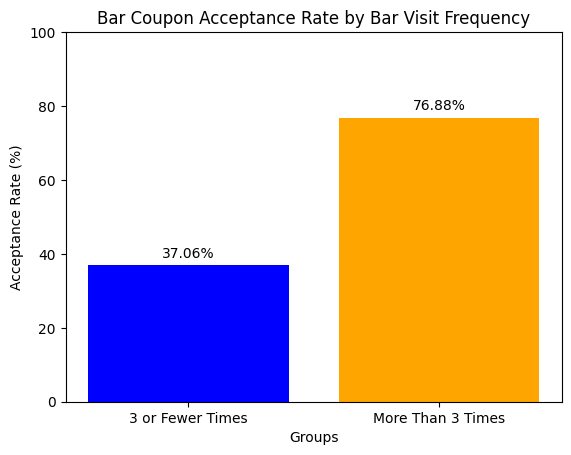

In [ ]:
import matplotlib.pyplot as plt

# Store acceptance rates in a list
acceptance_rates = [acceptance_rate_3_or_less, acceptance_rate_3ormore]
groups = ['3 or Fewer Times', 'More Than 3 Times']

# Create a bar chart
plt.bar(groups, acceptance_rates, color=['blue', 'orange'])
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Groups')
plt.title('Bar Coupon Acceptance Rate by Bar Visit Frequency')
plt.ylim(0, 100)  # Set y-axis limits for better visualization

# Add labels above the bars
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center')

plt.show()

# **# the above plot clearly states that people who goto bar more than 3 times a month have a higher chance of accepting the bar coupons **

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
# Create a boolean mask for the target group (go to bar more than once a month and over 25)
target_group_mask = (barCoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (barCoupons['age'] != 'below21') & (barCoupons['age'] != '21')

# Filter the DataFrame using the mask
target_group = barCoupons[target_group_mask]
other_group = barCoupons[~target_group_mask]  # Invert the mask for the other group
target_group
other_group

# Calculate acceptance rates for each group
acceptance_rate_target = target_group['Y'].mean() * 100
acceptance_rate_other = other_group['Y'].mean() * 100
acceptance_rate_target
acceptance_rate_other

# Calculate the difference in acceptance rates
difference = acceptance_rate_target - acceptance_rate_other
print(f"Difference in acceptance rates: {difference:.2f}%")




Difference in acceptance rates: 36.02%


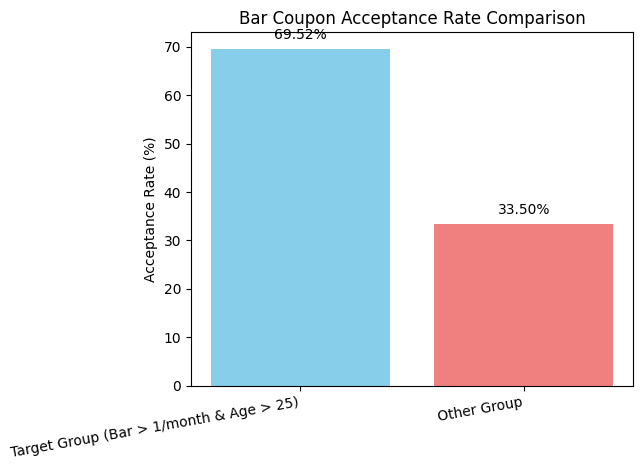

In [ ]:

# Group labels
groups = ['Target Group (Bar > 1/month & Age > 25)', 'Other Group']

# Acceptance rates for plotting
acceptance_rates = [acceptance_rate_target, acceptance_rate_other]

# Create the bar plot
plt.bar(groups, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.ylabel('Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xticks(rotation=10, ha='right')  # Rotate x-axis labels for better readability

# Add labels above the bars
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# ***Here it explains that people who are of age 25 and above and who goto bar more than once  a month have a higher percentage chance of accepting the coupons ***

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


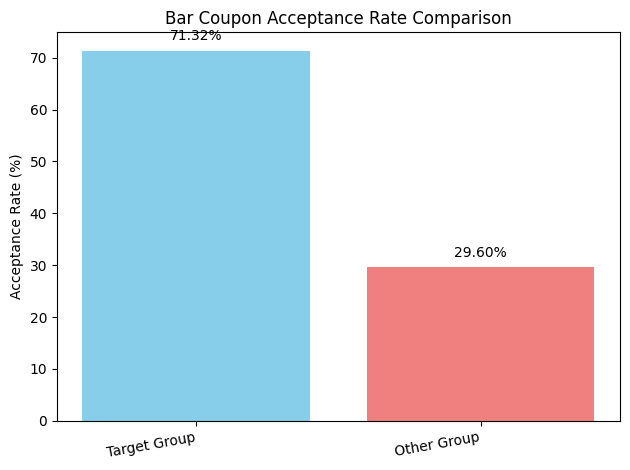

In [ ]:
# Create a boolean mask for the target group
target_group_mask = (barCoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & \
                   (barCoupons['passanger'] != 'Kid(s)') & \
                   (~barCoupons['occupation'].isin(['Farming, Fishing, and Forestry']))

# Filter the DataFrame using the mask
target_group = barCoupons[target_group_mask]
other_group = barCoupons[~target_group_mask]

# Calculate acceptance rates for each group
acceptance_rate_target = target_group['Y'].mean() * 100
acceptance_rate_other = other_group['Y'].mean() * 100

# Group labels
groups = ['Target Group', 'Other Group']
acceptance_rates = [acceptance_rate_target, acceptance_rate_other]

# Create the bar plot
plt.bar(groups, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.ylabel('Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xticks(rotation=10, ha='right')

# Add labels above the bars
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center')


plt.tight_layout()
plt.show()

# ***Here it explains that people who goto bar multiple times a month and who do not have kids and in some special professions have higher chance of accepting the coupon ***

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



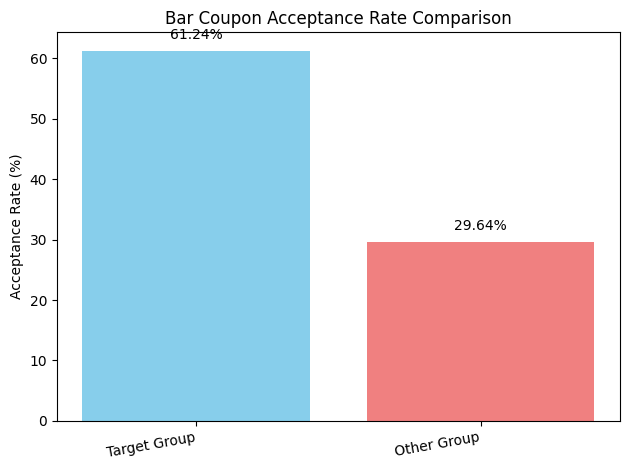

In [ ]:
# Define conditions for each group
group1_mask = (barCoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & \
              (barCoupons['passanger'] != 'Kid(s)') & \
              (barCoupons['maritalStatus'] != 'Widowed')

group2_mask = (barCoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & \
              (barCoupons['age'].isin(['below21', '21', '26']))

group3_mask = (barCoupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & \
              (barCoupons['income'].isin(['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))

# Combine masks to create the target group
target_group_mask = group1_mask | group2_mask | group3_mask  # "|" represents "OR"

# Filter the DataFrame
target_group = barCoupons[target_group_mask]
other_group = barCoupons[~target_group_mask]

# Calculate acceptance rates
acceptance_rate_target = target_group['Y'].mean() * 100
acceptance_rate_other = other_group['Y'].mean() * 100

# Group labels and acceptance rates for plotting
groups = ['Target Group', 'Other Group']
acceptance_rates = [acceptance_rate_target, acceptance_rate_other]

# Create the bar plot
plt.bar(groups, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.ylabel('Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xticks(rotation=10, ha='right')

# Add labels above the bars
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha = 'center')
plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# ***Based on the analysis, it is very evident that Target group customers have a higher chance of accepting the coupon ***

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# Let's do a similar excercise for "Coffee house" coupons
coffeehouse_coupons = newcoupondata[newcoupondata['coupon'] == 'Coffee House']
coffeehouse_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [ ]:
#What proportion of "coffee house" coupons were accepted?
coffeehouse_coupons_accepted = coffeehouse_coupons['Y'].apply(lambda a: 1 if a == 1 else 0).sum()
coffeehouse_coupons_accepted
coffeehouse_coupons_accepted_percent = (coffeehouse_coupons_accepted / coffeehouse_coupons.shape[0])*100
coffeehouse_coupons_accepted_percent

coffeehouse_coupons_notaccepted = coffeehouse_coupons['Y'].apply(lambda a: 1 if a == 0 else 0).sum()
coffeehouse_coupons_notaccepted
coffeehouse_coupons_notaccepted_percent = (coffeehouse_coupons_notaccepted / coffeehouse_coupons.shape[0])*100
coffeehouse_coupons_notaccepted_percent

50.07507507507507

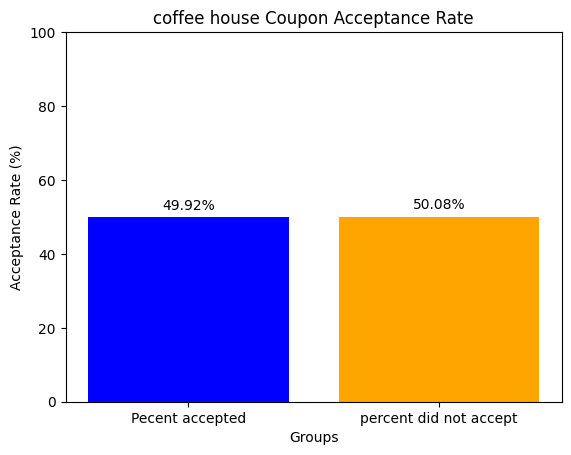

In [ ]:
# Let's create a bar chart to visualize the result
#set of proportion of coffee house accepted coupons

# Store acceptance rates in a list
acceptance_rates = [coffeehouse_coupons_accepted_percent, coffeehouse_coupons_notaccepted_percent]
groups = ['Pecent accepted', 'percent did not accept']

# Create a bar chart
plt.bar(groups, acceptance_rates, color=['blue', 'orange'])
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Groups')
plt.title('coffee house Coupon Acceptance Rate')
plt.ylim(0, 100)  # Set y-axis limits for better visualization

# Add labels above the bars
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center')

plt.show()

In [ ]:
# check to see the percent of acceptance who goto coffee house  more than 4 times a month

In [ ]:
ch_freq = ["never","1~3","less1"]
ch_coupon_3orless = coffeehouse_coupons.query('CoffeeHouse in@ch_freq')
ch_coupon_3orless

ch_frequency = ["gt8","4~8"]
ch_coupon_3ormore = coffeehouse_coupons.query('CoffeeHouse in @ch_frequency')
ch_coupon_3ormore

acceptance_rate_3_or_less = ch_coupon_3orless['Y'].mean() *100
acceptance_rate_3_or_less

acceptance_rate_3ormore = ch_coupon_3ormore['Y'].mean() *100
acceptance_rate_3ormore



67.5

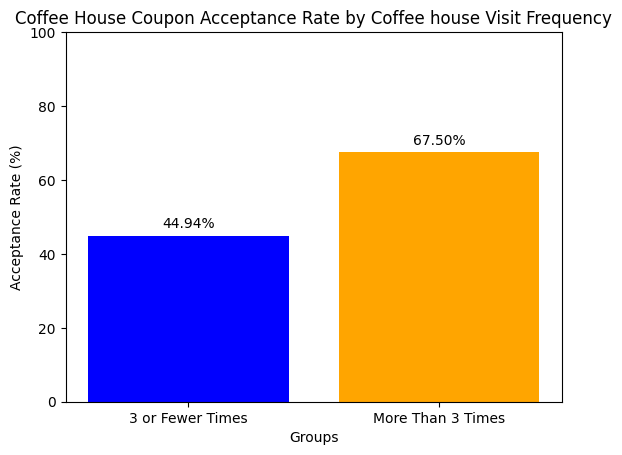

In [ ]:
acceptance_rates = [acceptance_rate_3_or_less, acceptance_rate_3ormore]
groups = ['3 or Fewer Times', 'More Than 3 Times']

# Create a bar chart
plt.bar(groups, acceptance_rates, color=['blue', 'orange'])
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Groups')
plt.title('Coffee House Coupon Acceptance Rate by Coffee house Visit Frequency')
plt.ylim(0, 100)  # Set y-axis limits for better visualization

# Add labels above the bars
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center')

plt.show()

# ***The above analysis explains that customer who happen to goto coffee house a lot tend to accept the coffee house coupons *** *italicized text*

In [ ]:
target_group_mask = (coffeehouse_coupons['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & \
                   (coffeehouse_coupons['education'].isin(['Graduate degree(Masters or Doctorate)','Bachelors degree']))  & \
                   (~coffeehouse_coupons['occupation'].isin(['Farming, Fishing, and Forestry']))
target_group_mask

# Filter the DataFrame using the mask
target_group = coffeehouse_coupons[target_group_mask]
other_group = coffeehouse_coupons[~target_group_mask]

# Calculate acceptance rates for each group
acceptance_rate_target = target_group['Y'].mean() * 100
acceptance_rate_other = other_group['Y'].mean() * 100

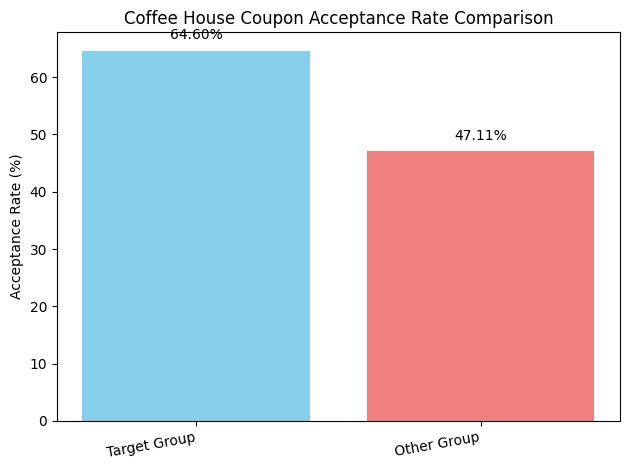

In [ ]:
# Lets visualize the results
# Group labels
groups = ['Target Group', 'Other Group']
acceptance_rates = [acceptance_rate_target, acceptance_rate_other]

# Create the bar plot
plt.bar(groups, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.ylabel('Acceptance Rate (%)')
plt.title('Coffee House Coupon Acceptance Rate Comparison')
plt.xticks(rotation=10, ha='right')

# Add labels above the bars
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center')


plt.tight_layout()
plt.show()

## ***Its clear that customers who have higher degrees , visit coffee house multiple times a month and who's occupation is not farming or fishing , have a higher chance of accepting the coffee house coupons ***

In [ ]:
# Define conditions for each group
group1_mask = (coffeehouse_coupons['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & \
              (coffeehouse_coupons['passanger'] != 'Kid(s)') & \
              (coffeehouse_coupons['maritalStatus'] == 'Married partner')

group2_mask = (coffeehouse_coupons['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & \
              (coffeehouse_coupons['age'].isin(['36', '41', '46','50plus']))

group3_mask = (coffeehouse_coupons['Restaurant20To50'].isin(['4~8', 'gt8'])) & \
              (coffeehouse_coupons['income'].isin(['$50000 - $62499', '$62499 - $744999', '$75000 - $87499', '$87500 - $99999']))

# Combine masks to create the target group
target_group_mask = group1_mask | group2_mask | group3_mask  # "|" represents "OR"

# Filter the DataFrame
target_group = coffeehouse_coupons[target_group_mask]
other_group = coffeehouse_coupons[~target_group_mask]

# Calculate acceptance rates
acceptance_rate_target = target_group['Y'].mean() * 100
acceptance_rate_other = other_group['Y'].mean() * 100

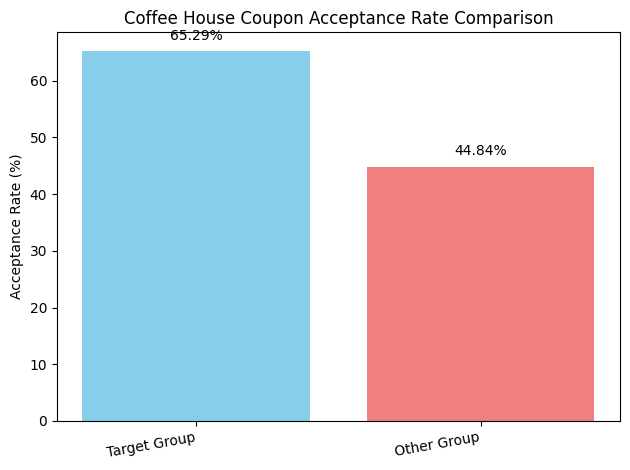

In [ ]:
# Lets visualize the results
# Group labels
groups = ['Target Group', 'Other Group']
acceptance_rates = [acceptance_rate_target, acceptance_rate_other]

# Create the bar plot
plt.bar(groups, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.ylabel('Acceptance Rate (%)')
plt.title('Coffee House Coupon Acceptance Rate Comparison')
plt.xticks(rotation=10, ha='right')

# Add labels above the bars
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center')


plt.tight_layout()
plt.show()

# ***There is a 65% chance of customers to accept the Coffee house coupons who goto coffee house multiple times a month, who have high income ranges, who are middle aged and who goto expensive restaurants ***